In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()

# Generate Some Data

# $y_t = 50 + 0.4\varepsilon_{t-1} + 0.3\varepsilon_{t-2} + \varepsilon_t$
# $\varepsilon_t \sim N(0,1)$

In [126]:
errors = np.random.normal(0, 1, 400)

In [127]:
date_index = pd.date_range(start='9/1/2019', end='1/1/2020')

In [128]:
mu = 50
series = []
for t in range(1,len(date_index)+1):
    series.append(mu + 0.4*errors[t-1] + 0.3*errors[t-2] + errors[t])

In [129]:
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index))

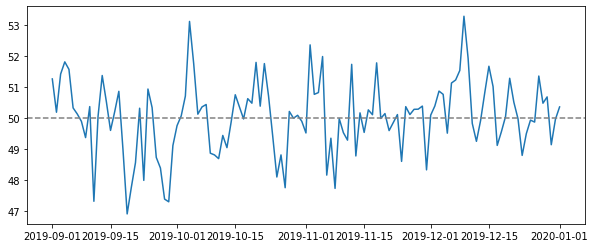

In [130]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey')

In [131]:
def calc_corr(series, lag):
    return pearsonr(series[:-lag], series[lag:])[0]

# ACF

<BarContainer object of 10 artists>

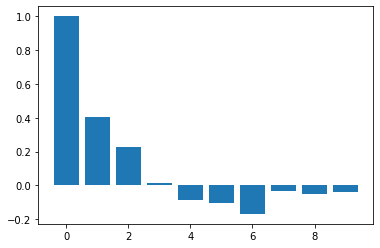

In [151]:
acf_vals = acf(series)
num_lags = 10
plt.bar(range(num_lags), acf_vals[:num_lags])

# PACF

<BarContainer object of 25 artists>

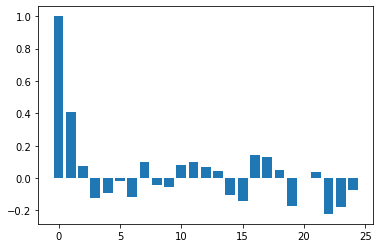

In [147]:
pacf_vals = pacf(series)
num_lags = 25
plt.bar(range(num_lags), pacf_vals[:num_lags])

# Get training and testing sets

In [134]:
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]

# Fit ARIMA Model

In [135]:
#create the model
model = ARIMA(train_data, order=(0,0,2))

In [136]:
#fit the model
model_fit = model.fit()

In [137]:
#summary of the model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  121
Model:                     ARMA(0, 2)   Log Likelihood                -179.864
Method:                       css-mle   S.D. of innovations              1.069
Date:                Sun, 29 Mar 2020   AIC                            367.727
Time:                        17:33:01   BIC                            378.910
Sample:                    09-01-2019   HQIC                           372.269
                         - 12-30-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0478      0.157    318.883      0.000      49.740      50.355
ma.L1.y        0.3686      0.088      4.176      0.000       0.196       0.542
ma.L2.y        0.2538      0.086      2.949      0.0

# Predicted Model:
# $\hat{y}_t = 50 + 0.37\varepsilon_{t-1} + 0.25\varepsilon_{t-2}$

In [138]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [139]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

In [140]:
residuals = test_data - predictions

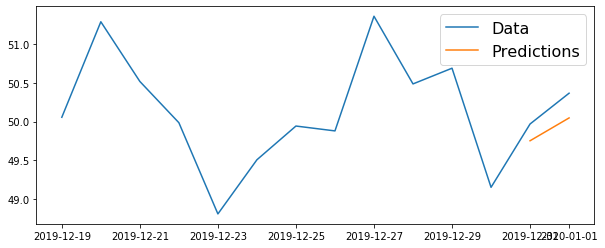

In [141]:
plt.figure(figsize=(10,4))

plt.plot(series[-14:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [142]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.0053


In [109]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 1.8254981729090671
